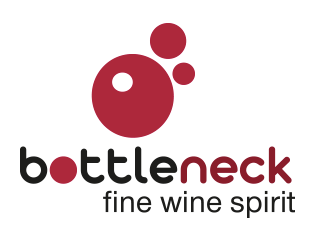

Pour ce projet j'ai pour mission d'effectuer un rapprochement de deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

Une fois le rapprochement effectué, je dois founir au client le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

Et enfin, faire une analyse sur les erreurs de saisie dans certains prix des produits afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

# <font color = B42633> **OPTIMISEZ LA GESTION DES DONNEES D'UNE BOUTIQUE AVEC PYTHON**


---


---



#<font color = B42633> **Préparation des données**

---



In [2]:
#importation des fichiers Excel
import pandas as pd
import numpy as np 

liaison = pd.read_excel('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P5_Ehouman_Yann/liaison.xlsx')
erp = pd.read_excel('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P5_Ehouman_Yann/erp.xlsx')
web = pd.read_excel('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P5_Ehouman_Yann/web.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [4]:
#Suppression des valeurs nulles 
web_nul = web[web['sku'].isnull()]
sku_nul = web_nul[web_nul['post_name'].notnull()]
web_final = web[web['sku'].notnull()]
web_final.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
#Suppression des doublons 
check_for_nan = web.isnull().values.any()
print (check_for_nan)

True


In [6]:
#Taille du dataframe web
web.size 


42364

In [7]:
#Taille du dataframe après suppression de valeur NaN
web.drop_duplicates(['sku']).size

20020

In [8]:
#Mise en place d'une fonction pour verifier une clé primaire

def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")


In [9]:
# web[sku] clé primaire ?? 

testerCle(web, ['sku'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1513, 28) (lignes, colonnes)


In [10]:
# erp['product_id] clé primaire ?? 

testerCle(erp,['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


In [11]:
# liaison['produict_id] clé primaire ?? 
testerCle(liaison, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


In [12]:
# Suppression des SKU doublons via "post_type"
web[web['sku'] == 15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [13]:
web_final = web_final[web_final['post_type'] == 'product']

In [14]:
# web_final['sku'] clé primaire ?
testerCle(web_final,['sku'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


In [15]:
#Fusion des dataframe "liaison" & "ERP"
erp_liaison = pd.merge(erp, liaison, on='product_id')

erp_liaison.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296


In [16]:
#Changement de nom de la colonne "SKU" en "id_web"

web_final.rename(columns={'sku': 'id_web'}, inplace=True)
web_final.head(3)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#<font color = B42633> **Rapprochement des bases** 

---







In [17]:
erp_liaison_web = pd.merge(erp_liaison, web_final, on='id_web')


In [18]:
erp_liaison_web.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#<font color = B42633> **Chiffre d'affaire total**

---



In [19]:
erp_liaison_web['prix_nb_vente'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']
print("Le chiffre d'affaires tolal est de : " ,erp_liaison_web['prix_nb_vente'].sum(), "euros")

Le chiffre d'affaires tolal est de :  70568.6 euros


# <font color = B42633>**Chiffre d'affaire par produit**

---



In [22]:
ca_par_produit = erp_liaison_web.groupby(['post_title']).sum()


ca_par_produit_trier = ca_par_produit.sort_values(by=['prix_nb_vente'],ascending=False).head(3)

ca_par_produit_trier['prix_nb_vente'].head(3)

post_title
Champagne Gosset Grand Blanc de Blancs    4704.0
Champagne Gosset Grand Rosé               4263.0
Cognac Frapin VIP XO                      2288.0
Name: prix_nb_vente, dtype: float64

#<font color = B42633> **Détection d’éventuelles valeurs aberrantes**


---



In [26]:
# fusion entre les dataframe "ERP" & "liaision"
df_erp_liaison = erp.merge(liaison, on='product_id', how='outer', indicator=True)


In [27]:
# Notons l'apparition d'une nouvelle colonne "merge"

df_erp_liaison.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both


In [28]:
#Test afin de voir s'il n'ya pas de ligne qui ne serait different du merge. Donc qui pourrait etre une erreur

df_test_join = df_erp_liaison[df_erp_liaison['_merge']!='both']
df_test_join

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


In [29]:
# Suppression de la colonne "merge"
df_erp_liaison = df_erp_liaison.drop(['_merge'], axis=1)

In [30]:
df_final = df_erp_liaison.merge(web_final, on='id_web', how='outer', indicator=True)

In [31]:
df_final.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [32]:
# Test afin de voir les ligne qui sont different entre les dataframe
df_test_join = df_final[df_final['_merge']!='both']
df_test_join.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [33]:
df_test_join = df_final[df_final['_merge']=='right_only']
df_test_join

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


La colonne "_merge" n'a pas de valeur "right only" donc les produits sont uniquement disponible sur le erp et pas en ligne.

In [34]:
df_final_ok = df_final[df_final['_merge']=='both']
df_final_ok.sample(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
638,5709,1,31.7,0,outofstock,15035,0.0,0.0,0.0,0.0,...,2019-05-20 15:50:03,2019-05-20 13:50:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
210,4200,1,5.8,190,instock,16295,0.0,0.0,0.0,0.0,...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
790,6585,1,19.0,38,instock,15434,0.0,0.0,0.0,0.0,...,2020-07-25 10:05:02,2020-07-25 08:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [35]:
df_final_ok = df_final_ok.drop(['_merge'], axis=1)

# <font color = B42633>**Représentation graphique des valeurs aberrantes**

---



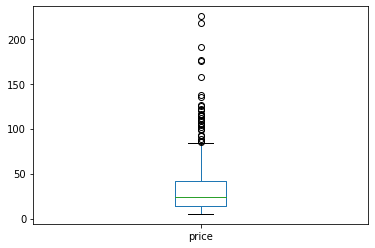

In [36]:
df_final_ok.boxplot(column =['price'], grid = False)

In [37]:
import scipy.stats as stats

In [39]:
df_final_ok['Income zscore'] = stats.zscore(df_final_ok['price'])

In [ ]:
df_final_ok['Income zscore']

0     -0.298410
1      0.065016
2     -0.420752
3     -0.661837
4      0.486015
         ...   
819   -0.866939
820   -0.179667
821    1.313620
822    0.802664
824   -0.582675
Name: Income zscore, Length: 714, dtype: float64

#<font color = B42633> **La liste des valeurs aberrantes**
---



In [40]:
price = df_final_ok['price']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe
priceOutliers = detectOutlier(price)

print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)
upper_bound = max(priceOutliers)
lower_bound = min(priceOutliers)

Nombre d'outliers détectés => 30
[100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


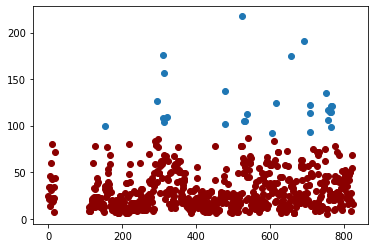

In [47]:
import numpy as np
import matplotlib.pyplot as plt
only_ok = df_final_ok[(df_final_ok['price'] < upper_bound) & (df_final_ok['price'] > lower_bound)]
only_outliers = df_final_ok[(df_final_ok['price'] > upper_bound) | (df_final_ok['price'] < lower_bound)]

# On plot
plt.scatter(only_ok['price'].index, only_ok['price'].values)
plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='darkred')
plt.show()
